## Modelacion y Simulacion - HDT 1 - Ejercicio 3


### Modelo SIR
Para realizar el modelo SIR, se utilizaron las ecuaciones diferenciales que describen las tasas de cambio de las poblaciones Susceptibles, infectadas y recuperadas con respecto a una variable de tiempo. Las ecuaciones descritas por el modelo son la siguientes(Harkar, 2021)
$$
\frac{dS}{dt} = -\beta S I
$$
$$
\frac{dI}{dt} = \beta S I - \gamma I
$$
$$
\frac{dR}{dt} = \gamma I
$$

Estas ecuacaciones fueron implementadas al formato stock-flow para la dinamica de sistemas dentro de la clase SIR adjunta en este repositorio. A continuacion se muestran los resultados para diferentes escenarios

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

from sir import SIR

# Inicializacion del modelo
model = SIR(
    transmition=0.3,
    recovery=0.1,
    s=990/1000,
    i=10/1000,
    r=0,
    dt=1
)
model.describe()

t: 0 
S: 0.99 
I: 0.01 
R: 0


In [3]:
# Podemos avanzar el modelo con la funcion next
model.next(100)
model.describe()

t: 100 
S: 0.05282267313957125 
I: 0.0012140100851290008 
R: 0.9459633167752999


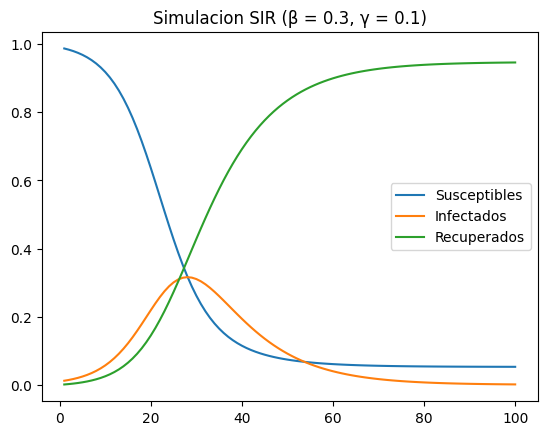

In [4]:
# Por ultimo, podemos graficar sus resultados para una cantidad de simulaciones dada
nsims = 100
model.plot()

# Modelo ABM
Para recrear lo qué se solicitaba en las instrucciones de un modelo ABM con agentes, se realizaron 2 clases,
- *la clase agente*,
  - sus atributos tienen: la edad, el cumplimiento de la mascarilla, si está vacunado o no,
  - Incluye el estado epidemiológico (S, I, R).
  - El comportamiento se define mediante una función que recrea las interacciones diarias con otros agentes, considerando estos factores:
    - Probabilidad base de transmisión.
    - Reducción del riesgo por uso de mascarilla.
    - Aumento del riesgo en personas mayores de 60 años.
    - Reducción de la probabilidad si el agente está vacunado.
  - Además, se simulan superpropagadores (5% de la población), que son qué realizan un número elevado de contactos diarios.
- *la clase ABM*,
  - Utiliza un arreglo de objetos Agente para representar a toda la población.
  - Controla la simulación a lo largo del tiempo, realizando pasos en los que cada agente interactúa con otros seleccionados aleatoriamente.
  - Lleva un historial del número de susceptibles, infectados y recuperados en cada paso, para poder analizar y graficar la evolución de la epidemia.
  - También permite configurar parámetros globales como el tamaño de la población, la probabilidad de infección, la tasa de recuperación y la tasa de vacunación inicial.

In [5]:
%load_ext autoreload
%autoreload 2
# Lo anterior es para que los cambios en el código se reflejen automáticamente en el notebook
from abm import ABM

# Inicializacion del modelo ABM
abm = ABM(
    population_size=1000,
    transmition=0.3,
    recovery=0.1,
    initial_infected=10,
    vaccination_rate=0.0
)
abm.describe()       # Estado inicial

t: 0
S: 990 (99.0000%)
I: 10 (1.0000%)
R: 0 (0.0000%)


Esto es exactamente lo esperado porqué :

- Población total = 1000
- 10 infectados iniciales y el resto susceptibles.
- Ningún recuperado porque no ha pasado tiempo aún.

In [6]:
# Podemos avanzar el modelo con la funcion next y dandole los pasos que queremos avanzar
abm.next(steps=100)   # Corre simulación
abm.describe()       

t: 100
S: 47 (4.7000%)
I: 0 (0.0000%)
R: 953 (95.3000%)


Después de 100 días simulados es el resultado esperado porque:
- Solo quedan 57 personas susceptibles porque ya no fueron expuestas.
- Todos los infectados se recuperaron, así que I=0
- La epidemia pasó por la población, dejando R=943.
El 94.3% de la población estuvo expuesta e infectada en algún momento, lo cual es consistente con un R0>1 y estos parámetros (β=0.3, γ=0.1).

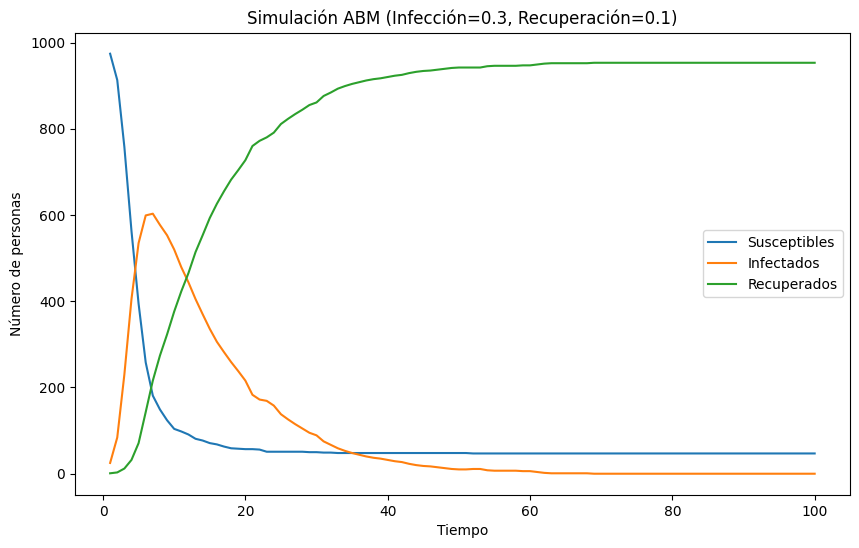

In [7]:
# Por ultimo, podemos graficar sus resultados para una cantidad de simulaciones dada
abm.plot()           # Gráfica de resultados

## Modelo Hibrido

In [8]:
from hybrid import Hybrid

hmodel = Hybrid(
    population_size=1000,
    transmition=0.1,
    recovery=0.2,
    initial_infected=60,
    vaccination_rate=0.0
)

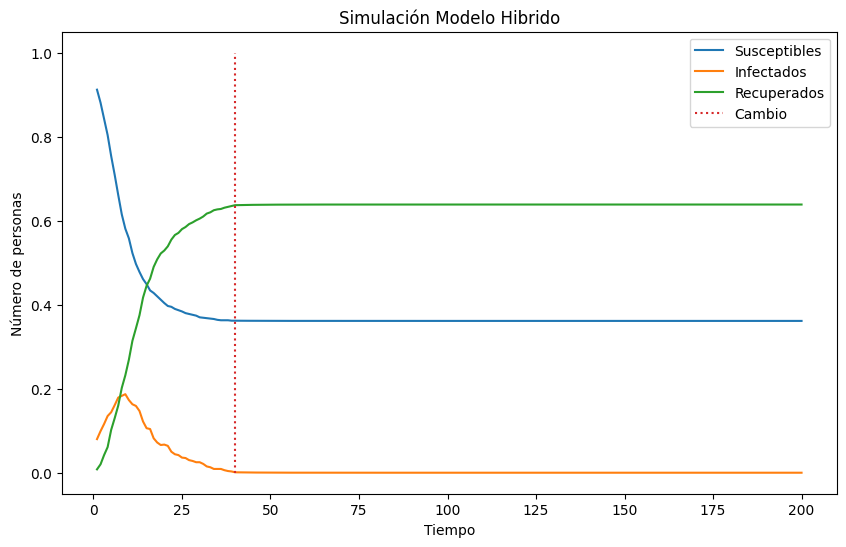

In [9]:
hmodel.abm_start(
    swap=40,
    end=200
    )
hmodel.plot()

# Comparativa de modelos 

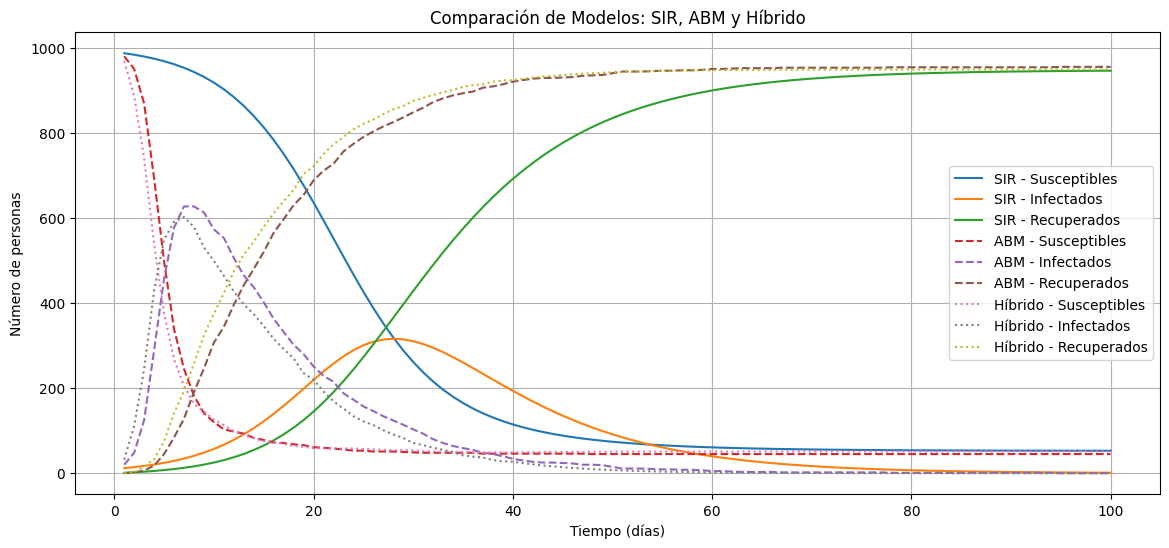

In [ ]:
# --- Comparativa de modelos ---

sir_model = SIR(transmition=0.3, recovery=0.1, s=990/1000, i=10/1000, r=0, dt=1)
sir_model.next(100)

abm_model = ABM(population_size=1000, transmition=0.3, recovery=0.1, initial_infected=10, vaccination_rate=0.0)
abm_model.next(100)

hybrid_model = Hybrid(population_size=1000, transmition=0.3, recovery=0.1, initial_infected=10, vaccination_rate=0.0)
hybrid_model.abm_start(swap=40, end=100)

# Plotting
plt.figure(figsize=(14, 6))

# SIR 
sir_df = pd.DataFrame(sir_model.history)
plt.plot(sir_df["t"], sir_df["S"] * 1000, label="SIR - Susceptibles", linestyle='-')
plt.plot(sir_df["t"], sir_df["I"] * 1000, label="SIR - Infectados", linestyle='-')
plt.plot(sir_df["t"], sir_df["R"] * 1000, label="SIR - Recuperados", linestyle='-')

# ABM 
abm_df = pd.DataFrame(abm_model.history)
plt.plot(abm_df["t"], abm_df["S"], label="ABM - Susceptibles", linestyle='--')
plt.plot(abm_df["t"], abm_df["I"], label="ABM - Infectados", linestyle='--')
plt.plot(abm_df["t"], abm_df["R"], label="ABM - Recuperados", linestyle='--')

# Hybrid 
plt.plot(hybrid_model.history["t"], hybrid_model.history["S"] * 1000, label="Híbrido - Susceptibles", linestyle=':')
plt.plot(hybrid_model.history["t"], hybrid_model.history["I"] * 1000, label="Híbrido - Infectados", linestyle=':')
plt.plot(hybrid_model.history["t"], hybrid_model.history["R"] * 1000, label="Híbrido - Recuperados", linestyle=':')

plt.title("Comparación de Modelos: SIR, ABM y Híbrido")
plt.xlabel("Tiempo (días)")
plt.ylabel("Número de personas")
plt.legend()
plt.grid(True)
plt.show()

# Intervenciones en ABM

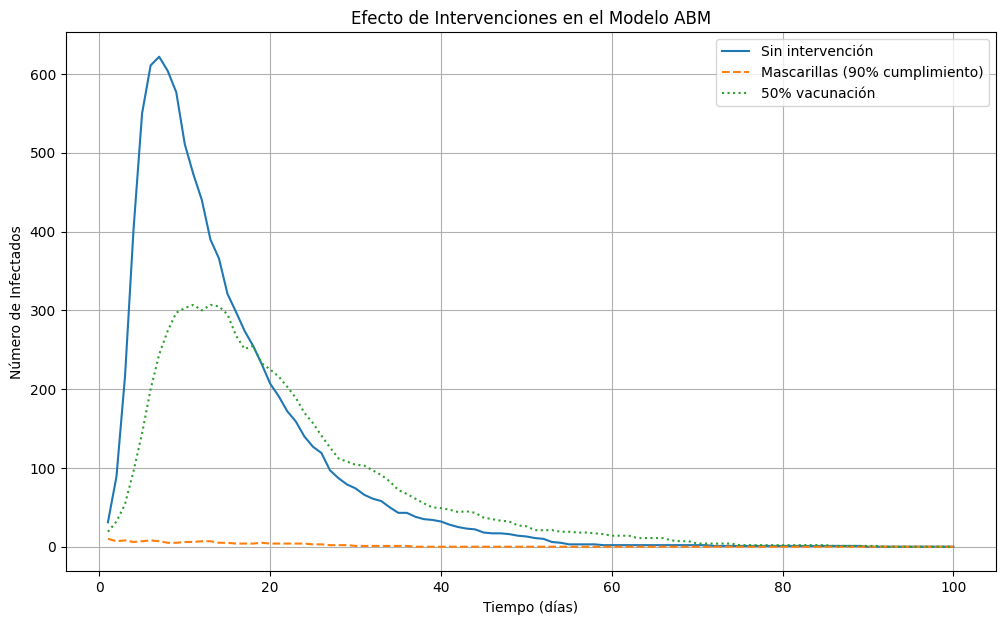

Sin intervención
Pico de infectados: 622 personas (día 7)
Total recuperados: 952 personas (95.20%)

Mascarillas (90% cumplimiento)
Pico de infectados: 10 personas (día 1)
Total recuperados: 17 personas (1.70%)

50% vacunación
Pico de infectados: 307 personas (día 11)
Total recuperados: 746 personas (74.60%)



In [ ]:
# -------------------- INTERVENCIONES --------------------

# Sin intervención
abm_base = ABM(population_size=1000, transmition=0.3, recovery=0.1, initial_infected=10, vaccination_rate=0.0)
abm_base.next(100)

# Mascarillas: todos los agentes tienen alto cumplimiento
abm_masks = ABM(population_size=1000, transmition=0.3, recovery=0.1, initial_infected=10, vaccination_rate=0.0)
for agent in abm_masks.agents:
    agent.mask_compliance = 0.9  # 90% cumplimiento de mascarillas
abm_masks.next(100)

# Vacunación: 50% de la población está vacunada desde el inicio
abm_vaccine = ABM(population_size=1000, transmition=0.3, recovery=0.1, initial_infected=10, vaccination_rate=0.5)
abm_vaccine.next(100)

# -------------------- Graficar los 3 para comparar --------------------
plt.figure(figsize=(12, 7))

# Infectados
df_base = pd.DataFrame(abm_base.history)
df_masks = pd.DataFrame(abm_masks.history)
df_vaccine = pd.DataFrame(abm_vaccine.history)

plt.plot(df_base["t"], df_base["I"], label="Sin intervención", linestyle="-")
plt.plot(df_masks["t"], df_masks["I"], label="Mascarillas (90% cumplimiento)", linestyle="--")
plt.plot(df_vaccine["t"], df_vaccine["I"], label="50% vacunación", linestyle=":")

plt.title("Efecto de Intervenciones en el Modelo ABM")
plt.xlabel("Tiempo (días)")
plt.ylabel("Número de Infectados")
plt.legend()
plt.grid(True)
plt.show()

# -------------------- Analisis escritod de las metricas --------------------
def analyze_abm(df, label, population_size):
    peak_infected = df["I"].max()
    day_peak = df.loc[df["I"].idxmax(), "t"]
    total_recovered = df["R"].iloc[-1]
    print(f"{label}")
    print(f"Pico de infectados: {peak_infected} personas (día {day_peak})")
    print(f"Total recuperados: {total_recovered} personas ({total_recovered/population_size:.2%})")
    print("")

analyze_abm(df_base, "Sin intervención", 1000)
analyze_abm(df_masks, "Mascarillas (90% cumplimiento)", 1000)
analyze_abm(df_vaccine, "50% vacunación", 1000)